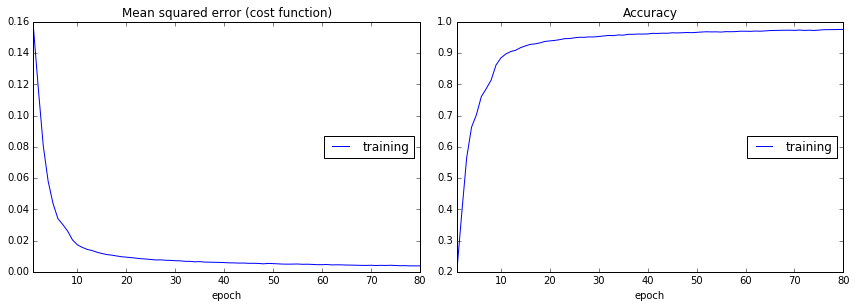

5
6


In [2]:
from keras.models import Sequential,Input
from keras.layers import Dense, Activation,Conv2D,MaxPooling2D,Flatten,Dropout
from keras.optimizers import SGD,RMSprop,Adam
import pandas as pd
from keras.losses import mean_squared_error,categorical_crossentropy,mean_squared_error
from keras.utils import plot_model
from livelossplot import PlotLossesKeras
# from keras.models import
import pandas as pd
import os
import cv2
import numpy as np
%matplotlib inline
import csv

df=pd.read_csv("train.csv")
y_train=df['label']
X_train=df.drop(labels='label',axis=1)
# print y_train
# print X_train.head()
# print np.reshape(np.asarray(X_train.iloc[0]),(-1,28))
X,y=[],[]
for i in range(42000):
    X.append(np.reshape(np.asarray(X_train.iloc[i]),(-1,28)))
    y.append(y_train.iloc[i])
print "done"

y=pd.get_dummies(np.asarray(y))
X=np.asarray(X)
nr,nx,ny=X.shape
X=np.reshape(X,(nr,nx,ny,1))
print X.shape,y.shape
input_shape=(28,28,1)

model=Sequential()
model.add(Conv2D(filters=6,kernel_size =(3,3),strides=(1,1),activation='relu',input_shape=input_shape))
print"1"
model.add(MaxPooling2D(pool_size=(2,2)))
print "1.5"
model.add(Conv2D(filters=12,kernel_size=(3,3),strides=(1,1),activation='relu'))
print "2"
model.add(MaxPooling2D(pool_size=(2,2)))
print "3"

model.add(Flatten())
print"4"

model.add(Dense(300,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))


model.compile(loss=mean_squared_error,
              optimizer=SGD(lr=0.005,decay=0.0000003),
              metrics=['accuracy'])
print "4"
model.fit(X,y,batch_size=16,epochs=80,callbacks=[PlotLossesKeras()],verbose=0)
print "5"
model.save("digits_kaggle.h5")
print "6"
